# Linear regression model - Simple

#Predict the Emission of the vehicle based on vehicle features and other parameters provided 

In [3]:
#import libraries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline

#Import the Data#

In [39]:
#create a dataframe of the source data set for analysis 
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")

#Data Exploration

In [9]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
#select few features for exploration
feature_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [12]:
feature_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [16]:
#create train and test set 
import random
sample = np.random.rand(len(df))<0.8
training_set = df[sample]
test_set = df[~sample]

In [21]:
#fit the Model to feature and label 
from sklearn import linear_model
model = linear_model.LinearRegression()
train_x = np.asanyarray(training_set[['ENGINESIZE']])
train_y = np.asanyarray(training_set[['CO2EMISSIONS']])

model.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
#print the model co.efficients

print("coefficient:",model.coef_)
print("Intercept:",model.intercept_)

coefficient: [[39.45836907]]
Intercept: [124.40846309]


Text(0, 0.5, 'Emission')

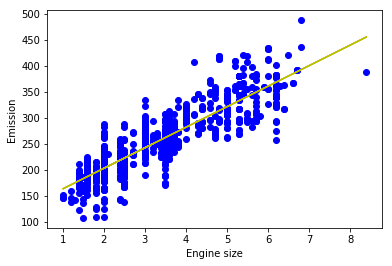

In [30]:
#Plot the model on the training set 
plt.scatter(training_set.ENGINESIZE, training_set.CO2EMISSIONS,  color='blue')
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-y')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [38]:
#model evaluation

from sklearn.metrics import r2_score

test_x = np.asanyarray(test_set[['ENGINESIZE']])
test_y = np.asanyarray(test_set[['CO2EMISSIONS']])
test_prediction = model.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_prediction , test_y) )

Mean absolute error: 20.36
Residual sum of squares (MSE): 767.30
R2-score: 0.76


In [ ]:
#model Inferences
#R square value represents model can able to explain 76% of the variations in the Testset. 